<a href="https://colab.research.google.com/github/Aartizikre150/DAB-103-Project/blob/main/DAB_103_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project** : Average waiting time for top priority procedures across Canada. In this, we are mainly focusing on wait times for procedures in 5 priority areas, including cancer treatment, cardiac care, diagnostic imaging, joint replacement and sight restoration.

Procedure list by different levels:

1.   Provincial level


*   Hip replacement
*   Knee replacement
*   Cataract surgery
*   Radiation therapy
*   Coronary artery bypass graft (CABG)
*   Computed tomography (CT) scan
*   Magnetic resonance imaging (MRI)
*   Cancer surgery (5 body sites: bladder, breast, colorectal, lung and prostate)



2.   Regional level


*   Hip replacement
*   Knee replacement

# Import the data

In [1]:
# load the data set from google drive
from google.colab import drive
drive.mount('/content/drive')

# import panda libary
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Project Directory path 
project_dir = '/content/drive/MyDrive/DAB-103 project/'
#/content/drive/MyDrive/DAB-103 project/Dataset.xlsx

data = pd.read_excel(project_dir+ 'Dataset.xlsx')
data

Mounted at /content/drive


,Reporting level,Province/territory,Region,Indicator,Metric,Data year,Unit of measurement,Indicator result
0,Provincial,Alberta,NaN,Bladder Cancer Surgery,50th Percentile,2008,Days,NaN
1,Provincial,Alberta,NaN,Bladder Cancer Surgery,90th Percentile,2008,Days,NaN
2,Provincial,Alberta,NaN,Bladder Cancer Surgery,Volume,2008,Number of cases,NaN
3,Provincial,Alberta,NaN,Breast Cancer Surgery,50th Percentile,2008,Days,NaN
4,Provincial,Alberta,NaN,Breast Cancer Surgery,90th Percentile,2008,Days,NaN
...,...,...,...,...,...,...,...,...
15759,Provincial,Saskatchewan,NaN,Prostate Cancer Surgery,Volume,2022,Number of cases,93.00
15760,Provincial,Saskatchewan,NaN,Radiation Therapy,% Meeting Benchmark,2022,Proportion,97.91
15761,Provincial,Saskatchewan,NaN,Radiation Therapy,50th Percentile,2022,Days,7.00
15762,Provincial,Saskatchewan,NaN,Radiation Therapy,90th Percentile,2022,Days,20.00


# Data information

In [2]:
# Get the dimension of the data
print(data.shape)

(15764, 8)


In [3]:
# Get the information of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15764 entries, 0 to 15763
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Reporting level      15764 non-null  object 
 1   Province/territory   15764 non-null  object 
 2   Region               5112 non-null   object 
 3   Indicator            15764 non-null  object 
 4   Metric               15764 non-null  object 
 5   Data year            15764 non-null  object 
 6   Unit of measurement  15764 non-null  object 
 7   Indicator result     12378 non-null  float64
dtypes: float64(1), object(7)
memory usage: 985.4+ KB


In [4]:
# Print the first 5 records of the dataset
data.head()

,Reporting level,Province/territory,Region,Indicator,Metric,Data year,Unit of measurement,Indicator result
0,Provincial,Alberta,NaN,Bladder Cancer Surgery,50th Percentile,2008,Days,NaN
1,Provincial,Alberta,NaN,Bladder Cancer Surgery,90th Percentile,2008,Days,NaN
2,Provincial,Alberta,NaN,Bladder Cancer Surgery,Volume,2008,Number of cases,NaN
3,Provincial,Alberta,NaN,Breast Cancer Surgery,50th Percentile,2008,Days,NaN
4,Provincial,Alberta,NaN,Breast Cancer Surgery,90th Percentile,2008,Days,NaN


In [5]:
# Print the Last 5 records of the dataset
data.tail()

,Reporting level,Province/territory,Region,Indicator,Metric,Data year,Unit of measurement,Indicator result
15759,Provincial,Saskatchewan,NaN,Prostate Cancer Surgery,Volume,2022,Number of cases,93.00
15760,Provincial,Saskatchewan,NaN,Radiation Therapy,% Meeting Benchmark,2022,Proportion,97.91
15761,Provincial,Saskatchewan,NaN,Radiation Therapy,50th Percentile,2022,Days,7.00
15762,Provincial,Saskatchewan,NaN,Radiation Therapy,90th Percentile,2022,Days,20.00
15763,Provincial,Saskatchewan,NaN,Radiation Therapy,Volume,2022,Number of cases,1293.00


In [6]:
# Print column names
print(data.columns.values)

['Reporting level' 'Province/territory' 'Region' 'Indicator' 'Metric'
 'Data year' 'Unit of measurement' 'Indicator result']


In [7]:
# Data description
print(data.describe(include='all'))

       Reporting level Province/territory      Region        Indicator  \
count            15764              15764        5112            15764   
unique               3                 11          71               14   
top         Provincial             Quebec  South Zone  Hip Replacement   
freq              9688               2260          72             3480   
mean               NaN                NaN         NaN              NaN   
std                NaN                NaN         NaN              NaN   
min                NaN                NaN         NaN              NaN   
25%                NaN                NaN         NaN              NaN   
50%                NaN                NaN         NaN              NaN   
75%                NaN                NaN         NaN              NaN   
max                NaN                NaN         NaN              NaN   

        Metric  Data year Unit of measurement  Indicator result  
count    15764    15764.0               15764

# Data Cleaning

In [8]:
#Convert object type to Categorical
data['Province/territory'] = pd.Categorical(data['Province/territory'])
data['Metric'] = pd.Categorical(data['Metric'])
data['Unit of measurement'] = pd.Categorical(data['Unit of measurement'])

# Rename column names
data.rename(columns = {'Unit of measurement':'unitOfMeasurement', 
                       'Province/territory':'Province', 
                       'Reporting level':'reportingLevel', 
                       'Indicator result':'indicatorResult', 
                       'Data year':'year'}, inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15764 entries, 0 to 15763
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   reportingLevel     15764 non-null  object  
 1   Province           15764 non-null  category
 2   Region             5112 non-null   object  
 3   Indicator          15764 non-null  object  
 4   Metric             15764 non-null  category
 5   year               15764 non-null  object  
 6   unitOfMeasurement  15764 non-null  category
 7   indicatorResult    12378 non-null  float64 
dtypes: category(3), float64(1), object(4)
memory usage: 663.0+ KB


In [9]:
# Print count of NA value in columns.
null_counts = data.isnull().sum()
print(null_counts)

reportingLevel           0
Province                 0
Region               10652
Indicator                0
Metric                   0
year                     0
unitOfMeasurement        0
indicatorResult       3386
dtype: int64


# Analysis

**Q1 :Did the COVID pandemic affect or contribute the wait time of medical procedures individually and across different provinces in Canada?**


**Precovid**

In [10]:
# filter the Data by Pre-covid years 2017,2018,2019
filtered_precovid_data = data[(data["year"].isin([2017, 2018, 2019])) & 
                              (data["Region"].isna())  & 
                              (data['Metric']=="90th Percentile") & 
                              (data['unitOfMeasurement']=="Days")]

# create pivot table
pivot_table_precovid_data = pd.pivot_table(filtered_precovid_data,
                             values= ['indicatorResult'],
                             index=["Province", "Indicator"],
                             aggfunc=np.mean)

# rename the column
pivot_table_precovid_data.columns = ["averageOfIndicator"]

# show the pivot table
pivot_table_precovid_data


# Convert pivot table to table
pivot_table_precovid_data = pivot_table_precovid_data.reset_index()
pivot_table_precovid_data.columns.name = None
pivot_table_precovid_data

,Province,Indicator,averageOfIndicator
0,Alberta,Bladder Cancer Surgery,70.033333
1,Alberta,Breast Cancer Surgery,47.666667
2,Alberta,CABG,72.333333
3,Alberta,CT Scan,106.000000
4,Alberta,Cataract Surgery,312.000000
...,...,...,...
113,Saskatchewan,Knee Replacement,358.333333
114,Saskatchewan,Lung Cancer Surgery,41.166667
115,Saskatchewan,MRI Scan,210.000000
116,Saskatchewan,Prostate Cancer Surgery,148.000000


<ipython-input-11-5b97f713a91f>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pivot_table_precovid_data_sub_df_1['Province'] = pivot_table_precovid_data_sub_df_1['Province'].astype('object')
<ipython-input-11-5b97f713a91f>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pivot_table_precovid_data_sub_df_2['Province'] = pivot_table_precovid_data_sub_df_2['Province'].astype('object')
<ipython-input-11-5b97f713a91f>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

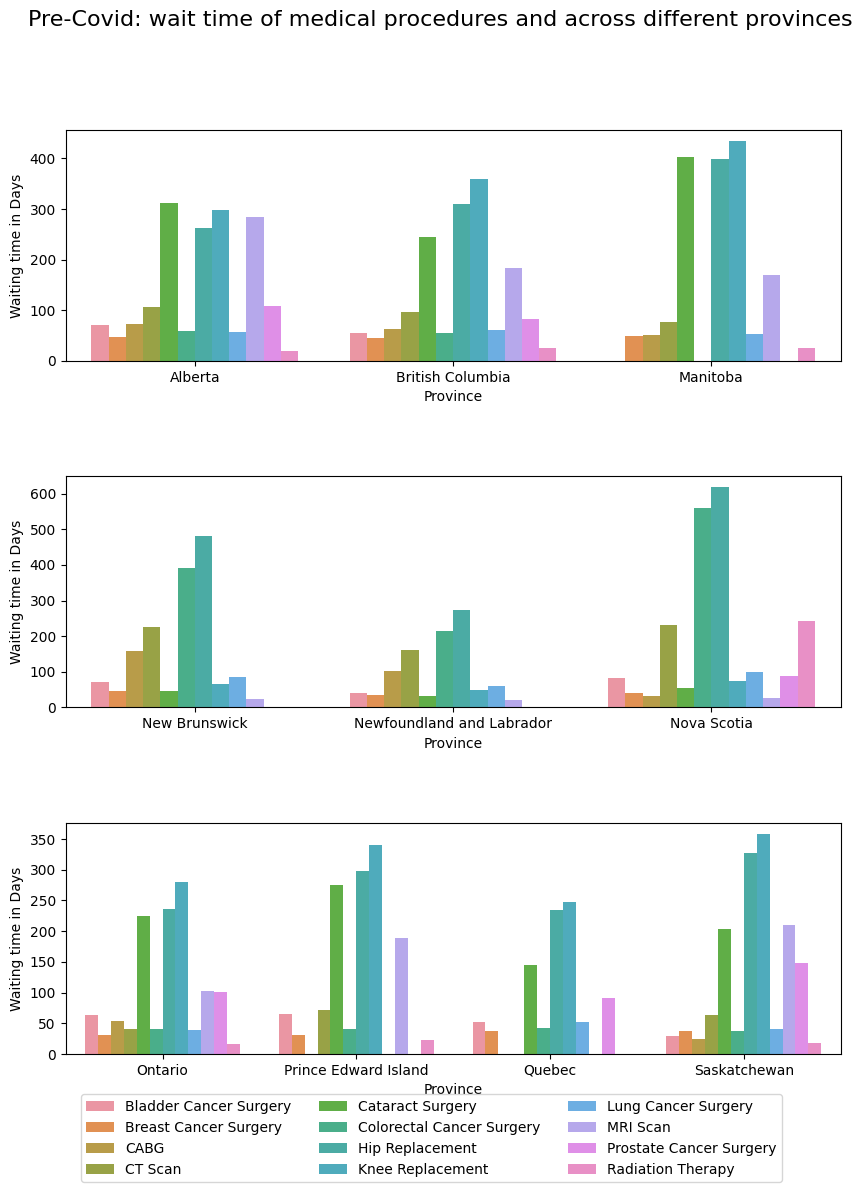

In [11]:
from matplotlib import legend
# create subplots with a grid of 3 rows and 1 column
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 12))

# Sub divide the dataframe
pivot_table_precovid_data_sub_df_1 = pivot_table_precovid_data[pivot_table_precovid_data['Province'].isin(['Alberta', 'British Columbia', 'Manitoba'])]
pivot_table_precovid_data_sub_df_2 = pivot_table_precovid_data[pivot_table_precovid_data['Province'].isin(['New Brunswick', 'Newfoundland and Labrador', 'Nova Scotia'])]
pivot_table_precovid_data_sub_df_3 = pivot_table_precovid_data[pivot_table_precovid_data['Province'].isin(['Ontario', 'Prince Edward Island', 'Quebec','Saskatchewan'])]

# Convert categorical datatype to object
pivot_table_precovid_data_sub_df_1['Province'] = pivot_table_precovid_data_sub_df_1['Province'].astype('object')
pivot_table_precovid_data_sub_df_2['Province'] = pivot_table_precovid_data_sub_df_2['Province'].astype('object')
pivot_table_precovid_data_sub_df_3['Province'] = pivot_table_precovid_data_sub_df_3['Province'].astype('object')

# create barplots for each sub-dataframe in each subplot
sns.barplot(data = pivot_table_precovid_data_sub_df_1, x = 'Province', y = 'averageOfIndicator', hue = 'Indicator', ax=axes[0])
sns.barplot(data = pivot_table_precovid_data_sub_df_2, x = 'Province', y = 'averageOfIndicator', hue = 'Indicator', ax=axes[1])
sns.barplot(data = pivot_table_precovid_data_sub_df_3, x = 'Province', y = 'averageOfIndicator', hue = 'Indicator', ax=axes[2])

# Add a common title to all subplots
fig.suptitle('Pre-Covid: wait time of medical procedures and across different provinces', fontsize=16)

# set y-axis label for each subplot
axes[0].set_ylabel('Waiting time in Days')
axes[1].set_ylabel('Waiting time in Days')
axes[2].set_ylabel('Waiting time in Days')

# remove the legends from all subgraph
for ax in axes:
    ax.legend([],[], frameon=False)

#plt.legend(title="Smoker", loc="upper left", labels=["No", "Yes"])
fig.subplots_adjust(hspace=0.5)

# Add a common legend to all subplots
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=3)

# display the plot
plt.show()


In [12]:
# filter the Data by Post-covid years 2021,2022
filtered_postcovid_data = data[(data["year"].isin([2021,2022])) & 
                               (data["Region"].isna()) & 
                               (data['Metric']=="90th Percentile") & 
                               (data['unitOfMeasurement']=="Days")]

# create pivot table
pivot_table_postcovid_data = pd.pivot_table(filtered_postcovid_data,
                             values= ['indicatorResult'],
                             index=["Province", "Indicator"],
                             aggfunc=np.mean)

# rename the column
pivot_table_postcovid_data.columns = ["averageOfIndicator"]

# show the pivot table
pivot_table_postcovid_data


# Convert pivot table to table
pivot_table_postcovid_data = pivot_table_postcovid_data.reset_index()
pivot_table_postcovid_data.columns.name = None
pivot_table_postcovid_data

,Province,Indicator,averageOfIndicator
0,Alberta,Bladder Cancer Surgery,71.0000
1,Alberta,Breast Cancer Surgery,39.5000
2,Alberta,CABG,52.4625
3,Alberta,CT Scan,98.0000
4,Alberta,Cataract Surgery,263.0000
...,...,...,...
113,Saskatchewan,Knee Replacement,763.0000
114,Saskatchewan,Lung Cancer Surgery,40.5000
115,Saskatchewan,MRI Scan,187.0000
116,Saskatchewan,Prostate Cancer Surgery,149.0000


<ipython-input-13-214755e0a201>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pivot_table_postcovid_data_sub_df_1['Province'] = pivot_table_postcovid_data_sub_df_1['Province'].astype('object')
<ipython-input-13-214755e0a201>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pivot_table_postcovid_data_sub_df_2['Province'] = pivot_table_postcovid_data_sub_df_2['Province'].astype('object')
<ipython-input-13-214755e0a201>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

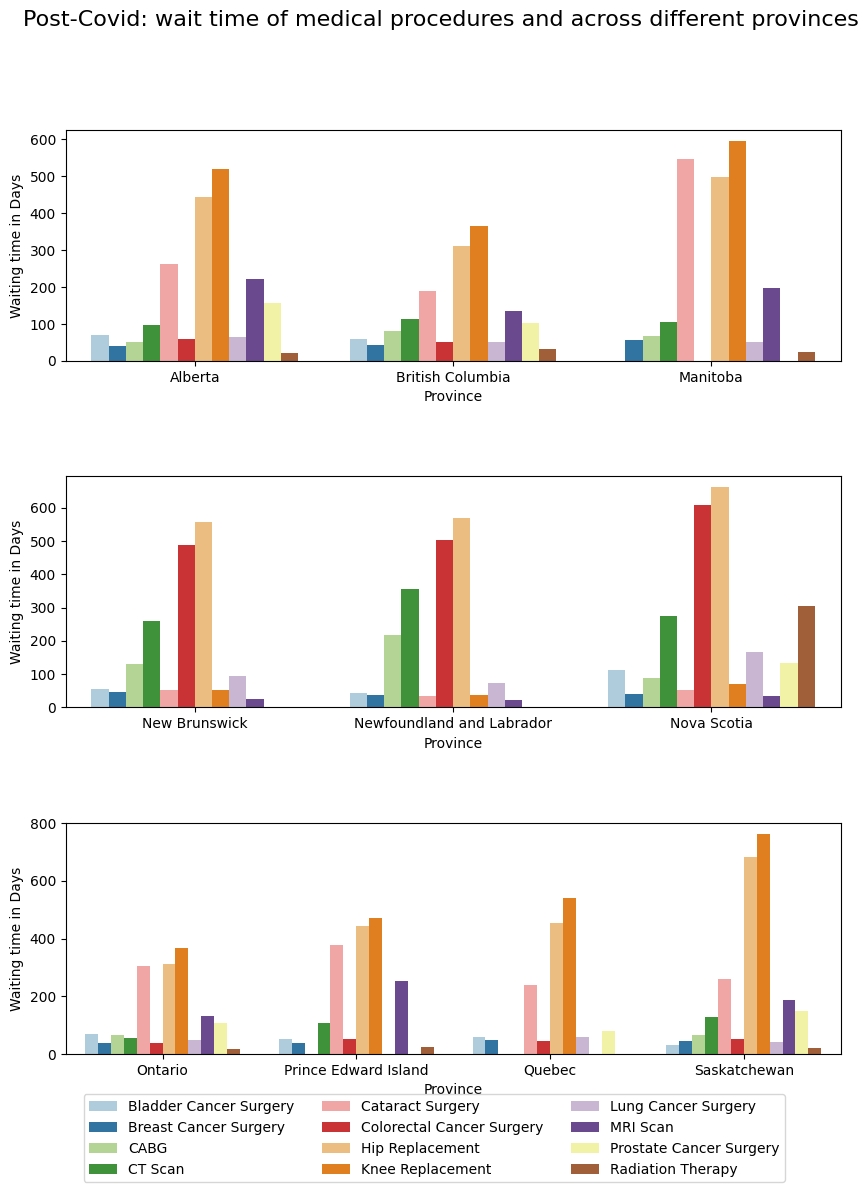

In [13]:
from matplotlib import legend
# create subplots with a grid of 3 rows and 1 column
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 12))

# Sub divide the dataframe
pivot_table_postcovid_data_sub_df_1 = pivot_table_postcovid_data[pivot_table_postcovid_data['Province'].isin(['Alberta', 'British Columbia', 'Manitoba'])]
pivot_table_postcovid_data_sub_df_2 = pivot_table_postcovid_data[pivot_table_postcovid_data['Province'].isin(['New Brunswick', 'Newfoundland and Labrador', 'Nova Scotia'])]
pivot_table_postcovid_data_sub_df_3 = pivot_table_postcovid_data[pivot_table_postcovid_data['Province'].isin(['Ontario', 'Prince Edward Island', 'Quebec','Saskatchewan'])]

# Convert categorical datatype to object
pivot_table_postcovid_data_sub_df_1['Province'] = pivot_table_postcovid_data_sub_df_1['Province'].astype('object')
pivot_table_postcovid_data_sub_df_2['Province'] = pivot_table_postcovid_data_sub_df_2['Province'].astype('object')
pivot_table_postcovid_data_sub_df_3['Province'] = pivot_table_postcovid_data_sub_df_3['Province'].astype('object')

# create barplots for each sub-dataframe in each subplot
sns.barplot(data = pivot_table_postcovid_data_sub_df_1, x = 'Province', y = 'averageOfIndicator', hue = 'Indicator', ax=axes[0], palette='Paired')
sns.barplot(data = pivot_table_postcovid_data_sub_df_2, x = 'Province', y = 'averageOfIndicator', hue = 'Indicator', ax=axes[1], palette='Paired')
sns.barplot(data = pivot_table_postcovid_data_sub_df_3, x = 'Province', y = 'averageOfIndicator', hue = 'Indicator', ax=axes[2], palette='Paired')

# Add a common title to all subplots
fig.suptitle('Post-Covid: wait time of medical procedures and across different provinces', fontsize=16)

# set y-axis label for each subplot
axes[0].set_ylabel('Waiting time in Days')
axes[1].set_ylabel('Waiting time in Days')
axes[2].set_ylabel('Waiting time in Days')

# remove the legends from all subgraph
for ax in axes:
    ax.legend([],[], frameon=False)

#plt.legend(title="Smoker", loc="upper left", labels=["No", "Yes"])
fig.subplots_adjust(hspace=0.5)

# Add a common legend to all subplots
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=3)

# display the plot
plt.show()


**Q2: Are some medical surgeries common or frequent in some provinces compared to other surgeries?**

<ipython-input-14-8d6804f243da>:36: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  top_5_filtered_df['Percentage'] = top_5_filtered_df.groupby('Province')['indicatorResult'].apply(lambda x: 100 * x / x.sum())
<ipython-input-14-8d6804f243da>:49: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  last_6

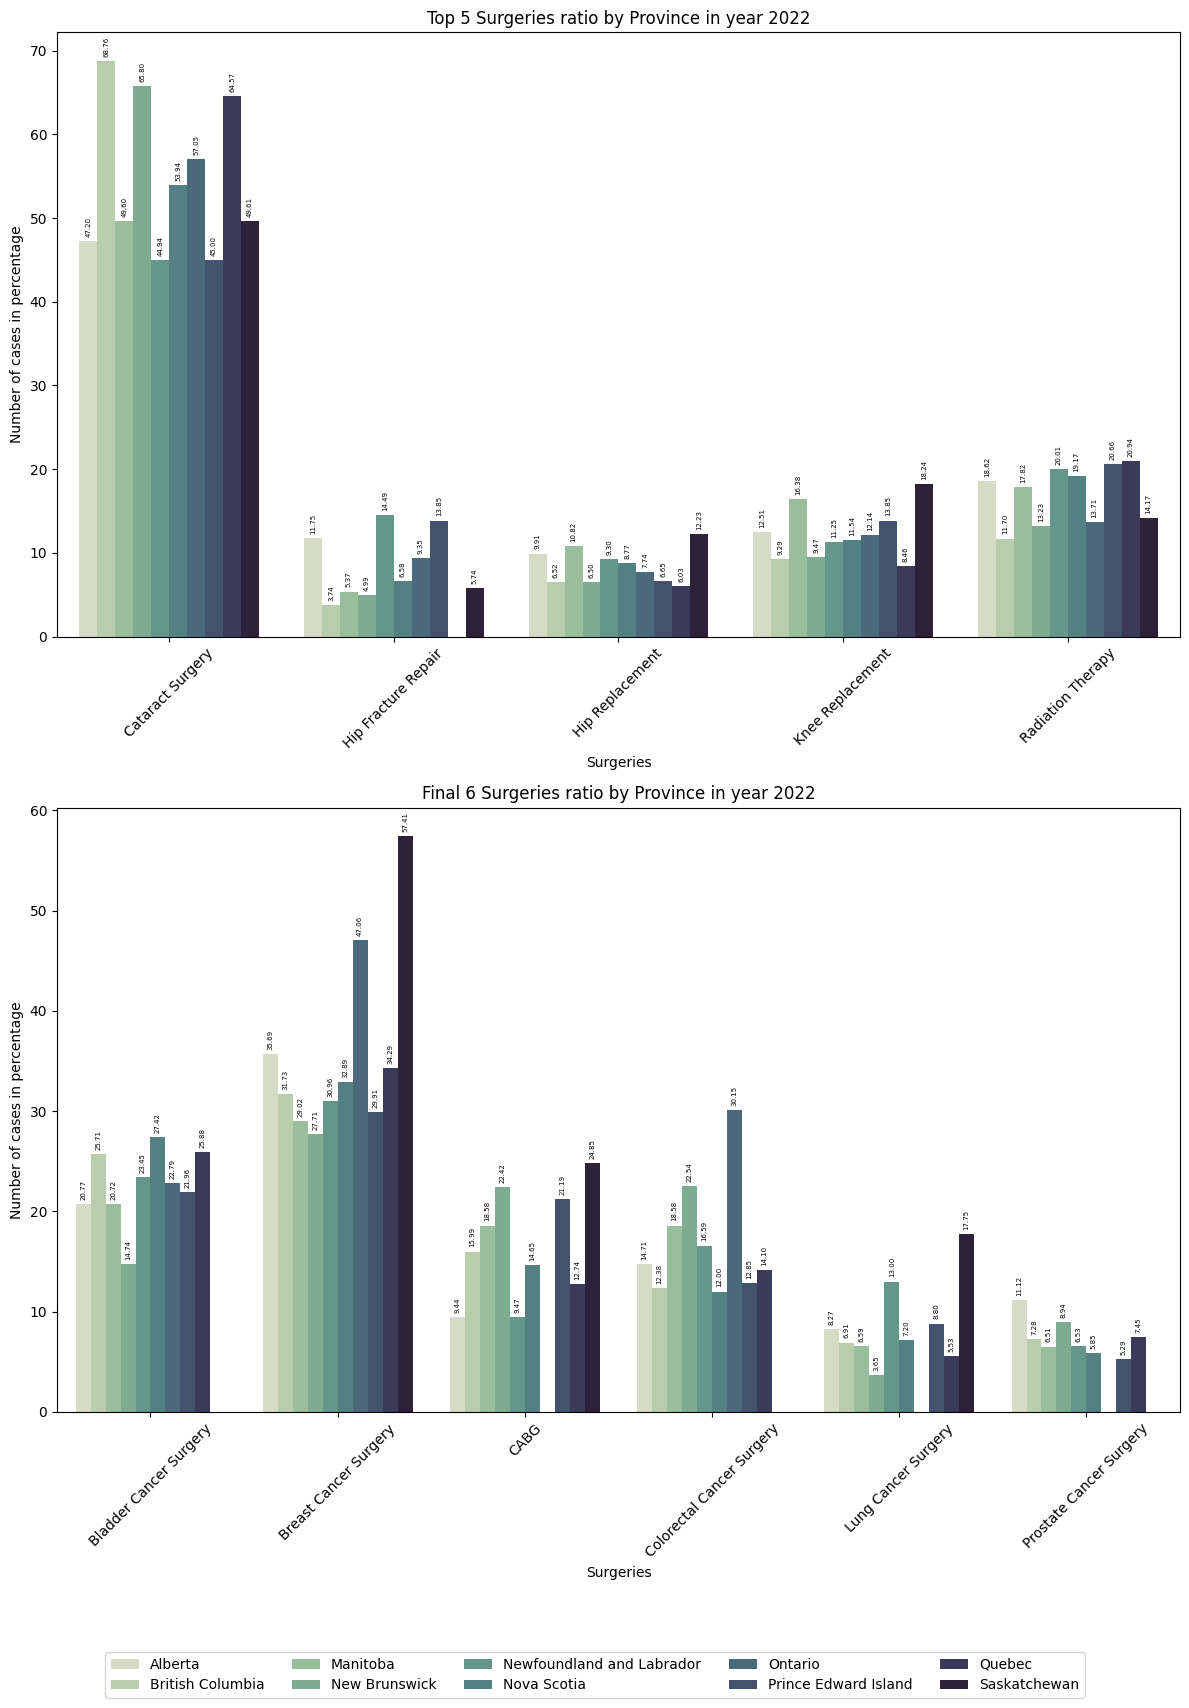

In [14]:
# Filter the data
filtered_df = data[(data['Region'].isna()) & 
                 (data['year'] == 2022) & 
                 (data['unitOfMeasurement'] == 'Number of cases')].copy()

# remove rows with NaN values for the "Indicator result" column
filtered_df = filtered_df.dropna(subset=['indicatorResult'])

# Convert categorical datatype to object
filtered_df['Province'] = filtered_df['Province'].astype('object')

# Exclude "Canada" from the list of Province
filtered_df = filtered_df[~filtered_df['Province'].isin(['Canada'])]

# Exclude "CT scan" and "MRI scan" from the list of surgeries (indicators)
filtered_df = filtered_df[~filtered_df['Indicator'].isin(['CT Scan', 'MRI Scan'])]

# define a palette of 10 colors using the HUSL color space
palette = sns.cubehelix_palette(10,start=.5, rot=-.75,)

# Change the value 'Hip Fracture Repair/Emergency and Inpatient' to 'Hip Fracture Repair' in the Indicator column
filtered_df['Indicator'] = filtered_df['Indicator'].replace('Hip Fracture Repair/Emergency and Inpatient', 'Hip Fracture Repair')

# Top 5 indicators
top_indicators = filtered_df.groupby('Indicator')['indicatorResult'].sum().sort_values(ascending=True).rename_axis(None)
top_5_indicators = top_indicators.nlargest(5)
top_5_index = list(top_5_indicators.index)

# Top 5 dataframe
top_5_filtered_df = filtered_df[filtered_df['Indicator'].isin(top_5_index)]

# Group the data by the indicator category and sum the indicator result (Duplicate)
top_5_filtered_df = top_5_filtered_df.groupby(['Indicator', 'Province']).agg({'indicatorResult': 'sum'}).reset_index()

# Calculate the percentage of each indicator result for each province
top_5_filtered_df['Percentage'] = top_5_filtered_df.groupby('Province')['indicatorResult'].apply(lambda x: 100 * x / x.sum())

# Last 6 indicators
last_6_indicators = top_indicators.head(6)
last_6_index = list(last_6_indicators.index)

# Top 5 dataframe
last_6_filtered_df = filtered_df[filtered_df['Indicator'].isin(last_6_index)]

# Group the data by the indicator category and sum the indicator result (Duplicate)
last_6_filtered_df = last_6_filtered_df.groupby(['Indicator', 'Province']).agg({'indicatorResult': 'sum'}).reset_index()

# Calculate the percentage of each indicator result for each province
last_6_filtered_df['Percentage'] = last_6_filtered_df.groupby('Province')['indicatorResult'].apply(lambda x: 100 * x / x.sum())

# create a figure with 2 subplots side by side
fig, axs = plt.subplots(nrows=2, figsize=(12, 16))

# create the barplot for the top 5 indicators
sns.barplot(data=top_5_filtered_df, x='Indicator', y='Percentage', hue='Province', palette=palette, ax=axs[0])

# set the first subplot as ax[0]
axs[0].set_title('Top 5 Surgeries ratio by Province in year 2022')
axs[0].set_xlabel('Surgeries')
axs[0].set_ylabel('Number of cases in percentage')
axs[0].tick_params(axis='x', rotation=45)

# add data labels to the bars
for p in axs[0].containers:
    axs[0].bar_label(p, label_type='edge', fontsize=5, padding=3, rotation=90, fmt='%.2f')

# create the barplot for the last 6 indicators
sns.barplot(data=last_6_filtered_df, x='Indicator', y='Percentage', hue='Province', palette=palette, ax=axs[1])

# set the second subplot as ax[1]
axs[1].set_title('Final 6 Surgeries ratio by Province in year 2022')
axs[1].set_xlabel('Surgeries')
axs[1].set_ylabel('Number of cases in percentage')
axs[1].tick_params(axis='x', rotation=45)

# remove the legends from all subgraph
for ax in axs:
    ax.legend([],[], frameon=False)

# add data labels to the bars
for p in axs[1].containers:
    axs[1].bar_label(p, label_type='edge', fontsize=5, padding=3, rotation=90, fmt='%.2f')

# create a custom legend
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='center', bbox_to_anchor=(0.5, -0.05), ncol=5)

# adjust the layout of the subplots
plt.tight_layout()

# show the chart
plt.show()


**Q3: Do some provinces show significant higher wait times when compared to others?**

In [15]:
# filter the Data by 2022
filtered_data_by_2022 = data[(data["year"].isin([2022])) & (data["Region"].isna()) & (data['Metric']=="90th Percentile") & (data['unitOfMeasurement']=="Days")]

# create pivot table
pivot_table_filtered_data_by_2022 = pd.pivot_table(filtered_data_by_2022,
                             values= ['indicatorResult'],
                             index=["Province", "Indicator"],
                             aggfunc=np.mean)

# rename the column
pivot_table_filtered_data_by_2022.columns = ["averageOfIndicator"]

# show the pivot table
#pivot_table_filtered_data_by_2022


# Convert pivot table to table
pivot_table_filtered_data_by_2022 = pivot_table_filtered_data_by_2022.reset_index()
pivot_table_filtered_data_by_2022.columns.name = None

# Exclude "Canada" from the list of Province
pivot_table_filtered_data_by_2022 = pivot_table_filtered_data_by_2022[~pivot_table_filtered_data_by_2022['Province'].isin(['Canada'])]

# Exclude "CT scan" and "MRI scan" from the list of surgeries (indicators)
pivot_table_filtered_data_by_2022 = pivot_table_filtered_data_by_2022[~pivot_table_filtered_data_by_2022['Indicator'].isin(['CT Scan', 'MRI Scan'])]

# Change the value 'Hip Fracture Repair/Emergency and Inpatient' to 'Hip Fracture Repair' in the Indicator column
pivot_table_filtered_data_by_2022['Indicator'] = pivot_table_filtered_data_by_2022['Indicator'].replace('Hip Fracture Repair/Emergency and Inpatient', 'Hip Fracture Repair')

pivot_table_filtered_data_by_2022

,Province,Indicator,averageOfIndicator
0,Alberta,Bladder Cancer Surgery,78.0
1,Alberta,Breast Cancer Surgery,43.0
2,Alberta,CABG,47.0
4,Alberta,Cataract Surgery,260.0
5,Alberta,Colorectal Cancer Surgery,63.0
...,...,...,...
112,Saskatchewan,Hip Replacement,725.5
113,Saskatchewan,Knee Replacement,831.0
114,Saskatchewan,Lung Cancer Surgery,40.0
116,Saskatchewan,Prostate Cancer Surgery,141.0


<ipython-input-16-63ce82c53db9>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pivot_table_filtered_data_by_2022_sub_df_1['Province'] = pivot_table_filtered_data_by_2022_sub_df_1['Province'].astype('object')
<ipython-input-16-63ce82c53db9>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pivot_table_filtered_data_by_2022_sub_df_2['Province'] = pivot_table_filtered_data_by_2022_sub_df_2['Province'].astype('object')
<ipython-input-16-63ce82c53db9>:16: SettingWithCopyWarning: 
A value is trying to be set o

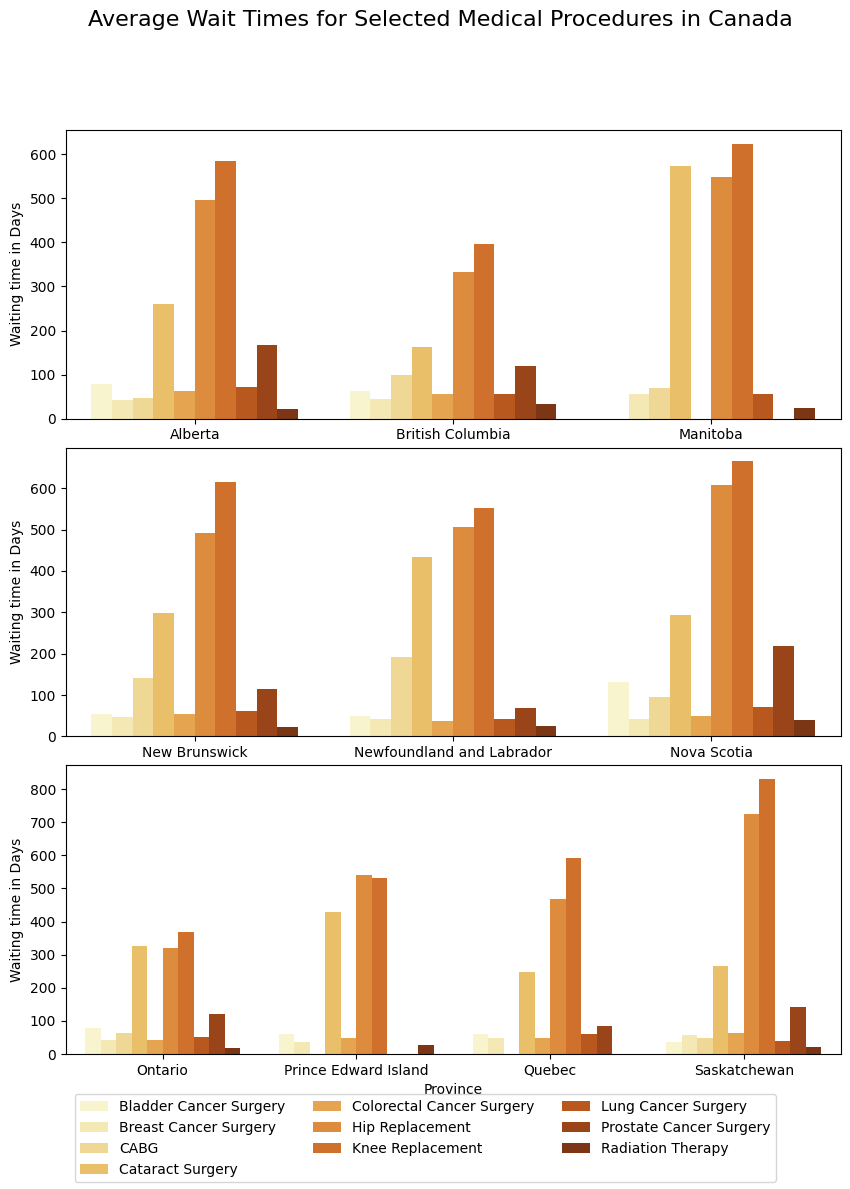

In [16]:
from matplotlib import legend
# create subplots with a grid of 3 rows and 1 column
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 12))

# define a palette of 10 colors using the HUSL color space
palette = sns.color_palette("YlOrBr",10)

# Sub divide the dataframe
pivot_table_filtered_data_by_2022_sub_df_1 = pivot_table_filtered_data_by_2022[pivot_table_filtered_data_by_2022['Province'].isin(['Alberta', 'British Columbia', 'Manitoba'])]
pivot_table_filtered_data_by_2022_sub_df_2 = pivot_table_filtered_data_by_2022[pivot_table_filtered_data_by_2022['Province'].isin(['New Brunswick', 'Newfoundland and Labrador', 'Nova Scotia'])]
pivot_table_filtered_data_by_2022_sub_df_3 = pivot_table_filtered_data_by_2022[pivot_table_filtered_data_by_2022['Province'].isin(['Ontario', 'Prince Edward Island', 'Quebec','Saskatchewan'])]

# Convert categorical datatype to object
pivot_table_filtered_data_by_2022_sub_df_1['Province'] = pivot_table_filtered_data_by_2022_sub_df_1['Province'].astype('object')
pivot_table_filtered_data_by_2022_sub_df_2['Province'] = pivot_table_filtered_data_by_2022_sub_df_2['Province'].astype('object')
pivot_table_filtered_data_by_2022_sub_df_3['Province'] = pivot_table_filtered_data_by_2022_sub_df_3['Province'].astype('object')

# create barplots for each sub-dataframe in each subplot
sns.barplot(data = pivot_table_filtered_data_by_2022_sub_df_1, x = 'Province', y = 'averageOfIndicator', hue = 'Indicator', palette=palette, ax=axes[0], linewidth=1)
sns.barplot(data = pivot_table_filtered_data_by_2022_sub_df_2, x = 'Province', y = 'averageOfIndicator', hue = 'Indicator', palette=palette, ax=axes[1], linewidth=1)
sns.barplot(data = pivot_table_filtered_data_by_2022_sub_df_3, x = 'Province', y = 'averageOfIndicator', hue = 'Indicator', palette=palette, ax=axes[2], linewidth=1)

# Add a common title to all subplots
fig.suptitle('Average Wait Times for Selected Medical Procedures in Canada', fontsize=16)

# set y-axis label for each subplot
axes[0].set_ylabel('Waiting time in Days')
axes[1].set_ylabel('Waiting time in Days')
axes[2].set_ylabel('Waiting time in Days')

# remove the legends from all subgraph
for ax in axes:
    ax.legend([],[], frameon=False)

#plt.legend(title="Smoker", loc="upper left", labels=["No", "Yes"])
fig.subplots_adjust(hspace=0.1)

# Add a common legend to all subplots
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=3)

# display the plot
plt.show()

**Q4: Is there any abnormal trends displayed between these medical procedures and their waiting time?**

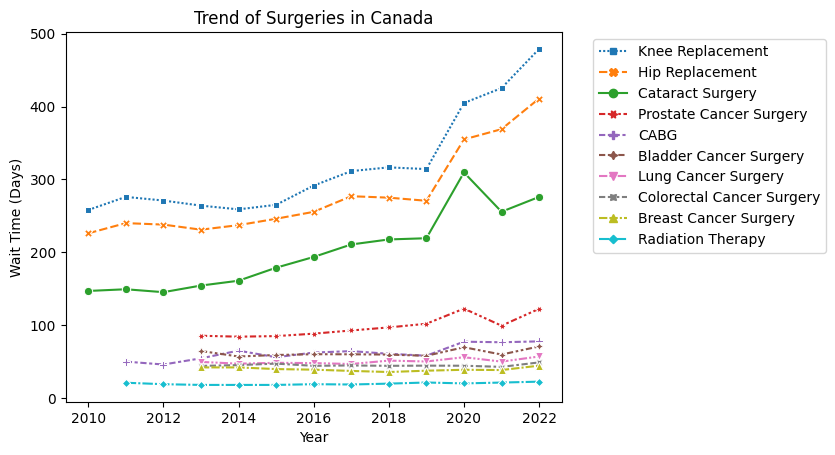

In [17]:
# Filter the data
filtered_df_q4 = data[(data['Region'].isna()) & 
                 (data['Province'] == 'Canada') & 
		             (data['Metric'] == '90th Percentile') &
		             (data['unitOfMeasurement'] == 'Days')]

# remove rows with NaN values for the "Indicator result" column
filtered_df_q4 = filtered_df_q4.dropna(subset=['indicatorResult'])

# change year data type from object to category
filtered_df_q4['year'] = filtered_df_q4['year'].astype('category')

# Exclude "CT scan" and "MRI scan" from the list of surgeries (indicators)
filtered_df_q4 = filtered_df_q4[~filtered_df_q4['Indicator'].isin(['CT Scan', 'MRI Scan'])]

# Sort the data by mean indicatorResult for each Indicator
indicator_means = filtered_df_q4.groupby('Indicator')['indicatorResult'].mean().sort_values(ascending=False).index

# Plot the line graph with sorted indicators
sns.lineplot(data=filtered_df_q4, x='year', y='indicatorResult', hue='Indicator', style='Indicator', markers=True, hue_order=indicator_means)

# Move the legend outside the graph
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Set the title and axes labels
plt.title('Trend of Surgeries in Canada')
plt.xlabel('Year')
plt.ylabel('Wait Time (Days)')

plt.show()

**Q5: What regions in the Ontario province have met the benchmark for performing a hip or knee replacement surgery before the average wait time?​**

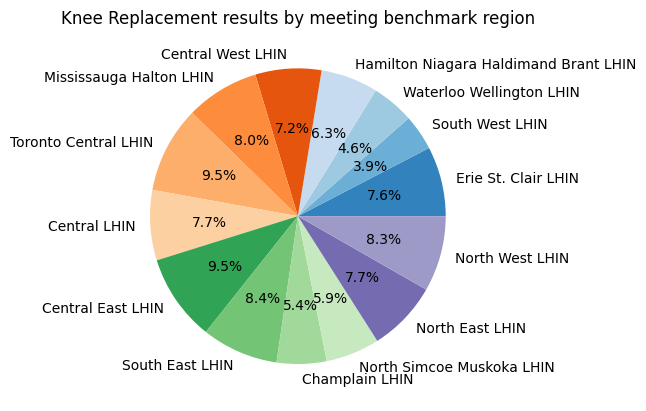

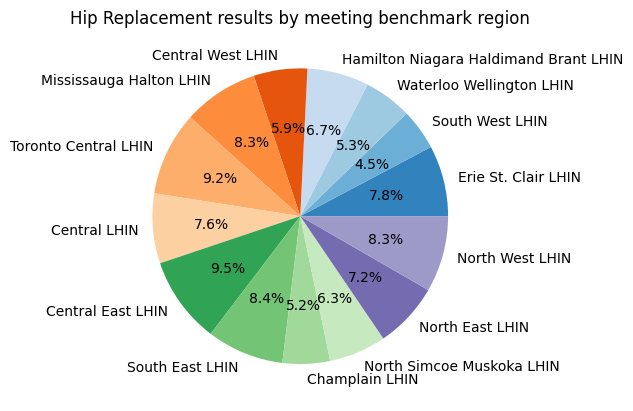

In [18]:
# Filter the data for knee replacement
filtered_df_q5_Knee_Replacement = data[(data['Region'].notna()) & 
                 (data['Province'] == 'Ontario')  & 
		             (data['Metric'] == '% Meeting Benchmark') &
		             (data['Indicator'] == 'Knee Replacement')  &
                 (data['year'] == 2022)]

# Create the pie chart
plt.pie(data=filtered_df_q5_Knee_Replacement, 
        x='indicatorResult', 
        labels='Region', 
        autopct='%1.1f%%',
        colors=plt.cm.tab20c(range(len(filtered_df_q5_Knee_Replacement['Province']))))

# Add a title
plt.title('Knee Replacement results by meeting benchmark region')

# Show the plot
plt.show()

# Filter the data for Hip Replacement
filtered_df_q5_hip_Replacement = data[(data['Region'].notna()) & 
                 (data['Province'] == 'Ontario')  & 
		             (data['Metric'] == '% Meeting Benchmark') &
		             (data['Indicator'] == 'Hip Replacement')  &
                 (data['year'] == 2022)]

filtered_df_q5_hip_Replacement

# Create the pie chart
plt.pie(data=filtered_df_q5_hip_Replacement, 
        x='indicatorResult', 
        labels='Region', 
        autopct='%1.1f%%',
        colors=plt.cm.tab20c(range(len(filtered_df_q5_Knee_Replacement['Province']))))

# Add a title
plt.title('Hip Replacement results by meeting benchmark region')

# Show the plot
plt.show()